In [197]:
import pandas as pd
import matplotlib.pyplot as plt

In [198]:
df_supermarket = pd.read_excel('Supermarket_Dataset.xlsx')
df_supermarket

,Category,City,Country,Customer Name,Manufacturer,Order Date,Order ID,Postal Code,Product Name,Region,...,Ship Date,Ship Mode,State,Sub-Category,Discount,Number of Records,Profit,Profit Ratio,Quantity,Sales
0,Office Supplies,Houston,United States,Darren Powers,Message Book,2013-01-03,CA-2011-103800,77095,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",Central,...,2013-01-07,Standard Class,Texas,Paper,0.2,1,$6,0.34,2,$16
1,Office Supplies,Naperville,United States,Phillina Ober,Avery,2013-01-04,CA-2011-112326,60540,Avery 508,Central,...,2013-01-08,Standard Class,Illinois,Labels,0.2,1,$4,0.36,3,$12
2,Office Supplies,Naperville,United States,Phillina Ober,SAFCO,2013-01-04,CA-2011-112326,60540,SAFCO Boltless Steel Shelving,Central,...,2013-01-08,Standard Class,Illinois,Storage,0.2,1,-$65,-0.24,3,$273
3,Office Supplies,Naperville,United States,Phillina Ober,GBC,2013-01-04,CA-2011-112326,60540,GBC Standard Plastic Binding Systems Combs,Central,...,2013-01-08,Standard Class,Illinois,Binders,0.8,1,-$5,-1.55,2,$4
4,Office Supplies,Philadelphia,United States,Mick Brown,Avery,2013-01-05,CA-2011-141817,19143,Avery Hi-Liter EverBold Pen Style Fluorescent ...,East,...,2013-01-12,Standard Class,Pennsylvania,Art,0.2,1,$5,0.25,3,$20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Technology,New York City,United States,Patrick O'Donnell,Other,2016-12-30,CA-2014-143259,10009,Gear Head AU3700S Headset,East,...,2017-01-03,Standard Class,New York,Phones,0.0,1,$3,0.03,7,$91
9990,Office Supplies,New York City,United States,Patrick O'Donnell,Wilson Jones,2016-12-30,CA-2014-143259,10009,Wilson Jones Legal Size Ring Binders,East,...,2017-01-03,Standard Class,New York,Binders,0.2,1,$20,0.38,3,$53
9991,Office Supplies,Fairfield,United States,Erica Bern,Cardinal,2016-12-30,CA-2014-115427,94533,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",West,...,2017-01-03,Standard Class,California,Binders,0.2,1,$5,0.33,2,$14
9992,Office Supplies,Fairfield,United States,Erica Bern,GBC,2016-12-30,CA-2014-115427,94533,GBC Binding covers,West,...,2017-01-03,Standard Class,California,Binders,0.2,1,$6,0.31,2,$21


In [222]:
print(df_supermarket.columns)
print(df_supermarket.shape)
print(df_supermarket.dtypes)


Index(['Category', 'City', 'Country', 'Customer Name', 'Manufacturer',
       'Order Date', 'Order ID', 'Postal Code', 'Product Name', 'Region',
       'Segment', 'Ship Date', 'Ship Mode', 'State', 'Sub-Category',
       'Discount', 'Number of Records', 'Profit', 'Profit Ratio', 'Quantity',
       'Sales', 'year'],
      dtype='object')
(9994, 22)
Category                     object
City                         object
Country                      object
Customer Name                object
Manufacturer                 object
Order Date           datetime64[ns]
Order ID                     object
Postal Code                   int64
Product Name                 object
Region                       object
Segment                      object
Ship Date            datetime64[ns]
Ship Mode                    object
State                        object
Sub-Category                 object
Discount                    float64
Number of Records             int64
Profit                      float64
Pr

In [200]:
df_supermarket['Discount'].mean()

0.1562027216329798

In [201]:
null_count = df_supermarket.isna().sum()
null_count

Category             0
City                 0
Country              0
Customer Name        0
Manufacturer         0
Order Date           0
Order ID             0
Postal Code          0
Product Name         0
Region               0
Segment              0
Ship Date            0
Ship Mode            0
State                0
Sub-Category         0
Discount             0
Number of Records    0
Profit               0
Profit Ratio         0
Quantity             0
Sales                0
dtype: int64

In [202]:
df_supermarket['State'].value_counts().idxmax()

'California'

In [203]:
print(df_supermarket['State'].nunique())

49


In [204]:
# Convert order date to datetime
df_supermarket['Order Date'] = pd.to_datetime(df_supermarket['Order Date'])

# Extract the year into a new column
df_supermarket['year'] = df_supermarket['Order Date'].dt.year

#Group by year and sum the items sold
yearly_sales = df_supermarket.groupby('year')['Quantity'].sum()

# Find the year with the most items sold
best_year = yearly_sales.idxmax()
max_items = yearly_sales.max()

print(best_year)
print(max_items)

2016
12503


Product Name
"While you Were Out" Message Book, One Form per Page                                                    10.0
#10 Gummed Flap White Envelopes, 100/Box                                                                17.0
#10 Self-Seal White Envelopes                                                                           52.0
#10 White Business Envelopes,4 1/8 x 9 1/2                                                             224.0
#10- 4 1/8" x 9 1/2" Recycled Envelopes                                                                115.0
                                                                                                       ...  
iKross Bluetooth Portable Keyboard + Cell Phone Stand Holder + Brush for Apple iPhone 5S 5C 5, 4S 4    116.0
iOttie HLCRIO102 Car Mount                                                                             -12.0
iOttie XL Car Mount                                                                                    -50.0
invisi

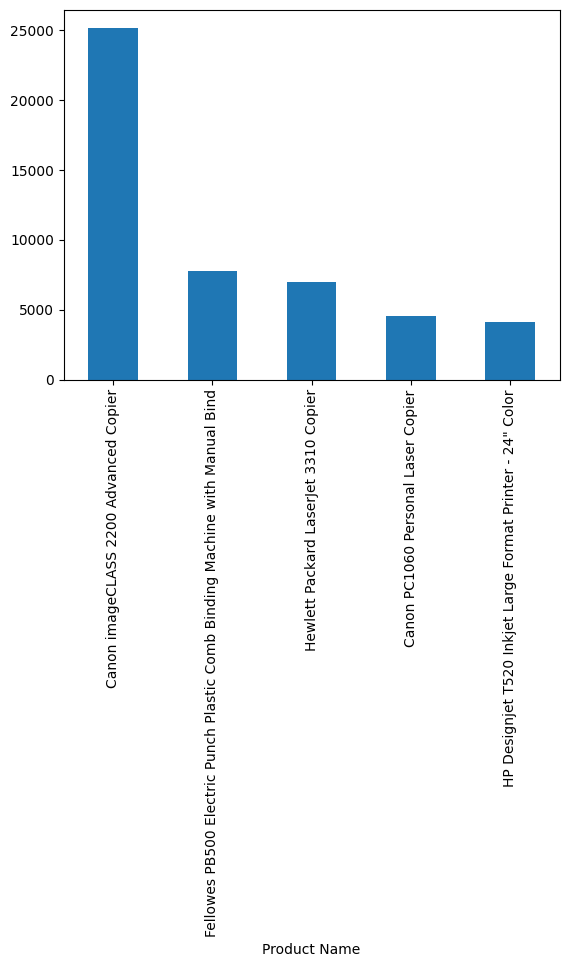

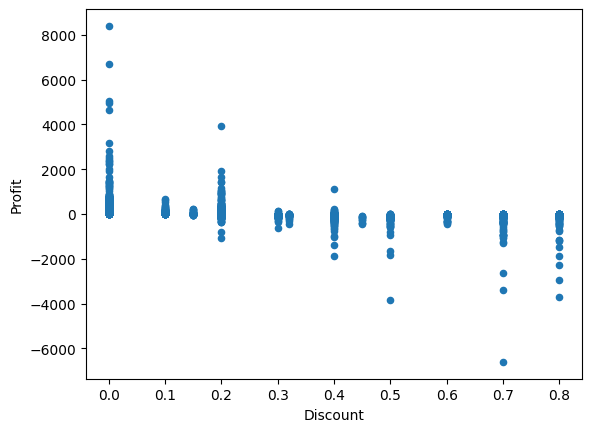

In [205]:
# clean the 'profit' column: remove $, convert to float
df_supermarket['Profit'] = df_supermarket['Profit'].map(lambda x: x.replace('$', '').replace(",", "")).astype(float)


# Group by product name and sum the profit
product_profit = df_supermarket.groupby('Product Name')['Profit'].sum()
print(product_profit)

# get top 5 products by profit
top5_product = product_profit.sort_values(ascending=False).head(5)
top5_product.plot(kind='bar')
plt.show()

# plot discount vs profit
df_supermarket.plot(kind='scatter', x='Discount', y='Profit')
plt.show()



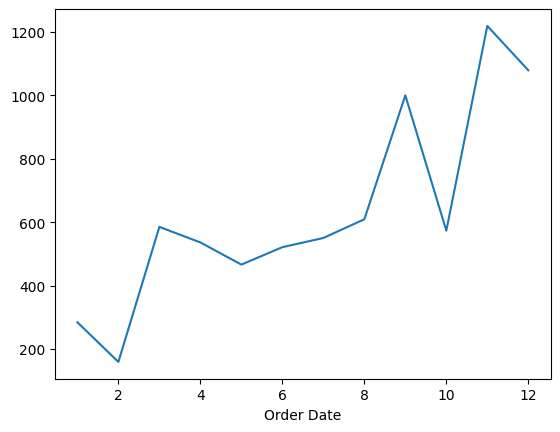

In [206]:
df_supermarket['year'] = pd.to_datetime(df_supermarket['Order Date']).dt.year
df_2013 = df_supermarket[df_supermarket['year'] == 2013]

# Group by month and sum the quantity
monthly_sales = df_2013.groupby(df_2013['Order Date'].dt.month)['Quantity'].sum()
monthly_sales

monthly_sales.plot(kind='line')
plt.show()

In [207]:
df_supermarket['Profit Ratio'].min()

-2.75

In [208]:
discount_sales = df_supermarket.groupby(['Discount'])['Quantity'].sum()
discount_sales

Discount
0.00    18267
0.10      373
0.15      198
0.20    13660
0.30      849
0.32      105
0.40      786
0.45       45
0.50      241
0.60      501
0.70     1660
0.80     1188
Name: Quantity, dtype: int64

In [220]:
# Exclude discount at 0
df_nonzero = df_supermarket[df_supermarket['Discount'] != 0]

# Group by discount and sum quantity
discount_qty = df_nonzero.groupby(['Discount'])['Quantity'].sum()

# Get the discount with the highest total quantity sold
top_discount = discount_qty.idxmax()
top_discount_qty = discount_qty.max()

print(top_discount)
print(top_discount_qty)




0.2
13660


In [221]:
# filter dataset to only top discount value
df_top_discount = df_nonzero[df_nonzero['Discount'] == top_discount]

# Group by product and sum quantity
product_sales = df_top_discount.groupby(['Product Name'])['Quantity'].sum()

# Get product with the highest quantity sold
top_product = product_sales.idxmax()
top_product_qty = product_sales.max()

print(top_product)
print(top_product_qty)

Staples
133
